############################################################################################

################## -- Programa de Especialización en Data Science Nivel II --##########################

############################################################################################

Modelos de Clasificación Basados en Arboles : C50 y Random Forest

Autores : José Cárdenas - André Chávez 

## Guía de Modelamiento de Información

#### 1 LIBRERÍAS A UTILIZAR

In [67]:
# Primer Curso de ML
#Importar las librerías necesarias en Python.
import pandas as pd ## Manejo de dataframes o set de datos
%matplotlib inline
import matplotlib.pyplot as plt2 ## Todo lo referente a gráficas y demás.
import matplotlib as plt
import numpy as np ## Todo lo referente a trabajar con vectores y matrices
from scipy import stats ## Herramientas y algoritmos matemáticos para python
import seaborn as sns # Se basa en Matplotlib y la complementa en el tema de graficos y demás.

#### 2 EXTRAYENDO LA DATA

In [68]:
train = pd.read_csv("C:/Users/ASUS/train.csv") 
# Leer el dataset en un dataframe usando pandas

In [69]:
#Leer los primeros registros.
train.head(5) # Puedes visualizar la cantidad de registro que requieras

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


#### 3 EXPLORACION DE LA DATA

#### Recurso: https://www.analyticsvidhya.com/blog/2014/07/statistics/

In [70]:
train.describe() #Resumen de la información

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


La función describe () proporcionaría count - conteo o número de elementos, mean - media, standard deviation (std) - desviación estándar, min - mínimo, cuartiles y max - máximo en su salida. Sólo considera las variables en formato de número.

#### Aquí hay algunas conclusiones

1. LoanAmount tiene (614 – 592) 22 valores perdidos.
2. Loan_Amount_Term tiene (614 – 600) 14 valores perdidos.
3. Credit_History tiene (614 – 564) 50 valores perdidos.
4. Nosotros podemos también observar que cerca del 84% de los solicitantes al préstamo tienen un historial crediticio. ¿Cómo? La media del campo Credit_History es 0.84 (Recordemos, Credit_History tiene o toma el valor 1 para aquellos que tienen historial crediticio y 0 en caso contrario).
5. La variable ApplicantIncome parece estar en línea con las espectativas al igual que CoapplicantIncome.

In [71]:
# Tabla Resumen
train.describe(include='all') # Describir todas las variables.

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP002659,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


In [7]:
# Gráficos para variables cuantitativas
#Histogramas y Cajas

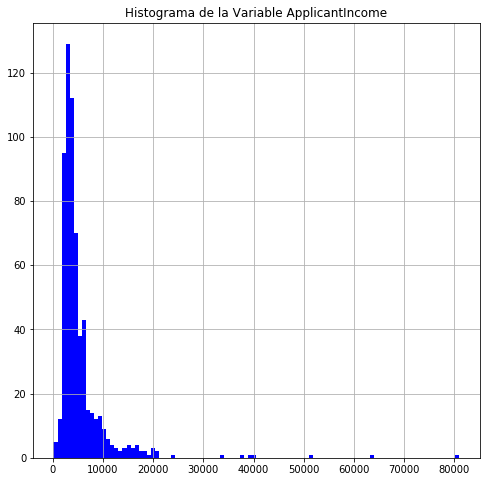

In [72]:
# Análisis Univariado de los atributos del data set
%matplotlib inline
import matplotlib.pyplot as plt
plt.title('Histograma de la Variable ApplicantIncome')
train['ApplicantIncome'].hist(figsize=(8,8),color="blue",bins=100)

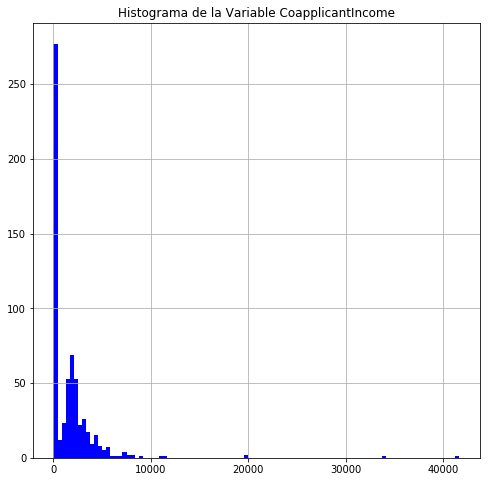

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.title('Histograma de la Variable CoapplicantIncome')
train['CoapplicantIncome'].hist(figsize=(8,8),color="blue",bins=100)

### Cuartiles y diagramas de cajas

Los cuartiles son los tres valores de la variable estadística que dividen a un conjunto de datos ordenados en cuatro partes iguales. Q1, Q2 y Q3 determinan los valores correspondientes al 25%, al 50% y al 75% de los datos. Q2 coincide con la mediana.

Los diagramas de cajas son una presentación visual que describe varias características importantes al mismo tiempo, tales como la dispersión y simetría. Para su realización se representan los tres cuartiles y los valores mínimo y máximo de los datos, sobre un rectángulo, alineado horizontal o verticalmente. Estos gráficos nos proporcionan abundante información y son sumamente útiles para encontrar valores atípicos y comparar dos conjunto de datos.



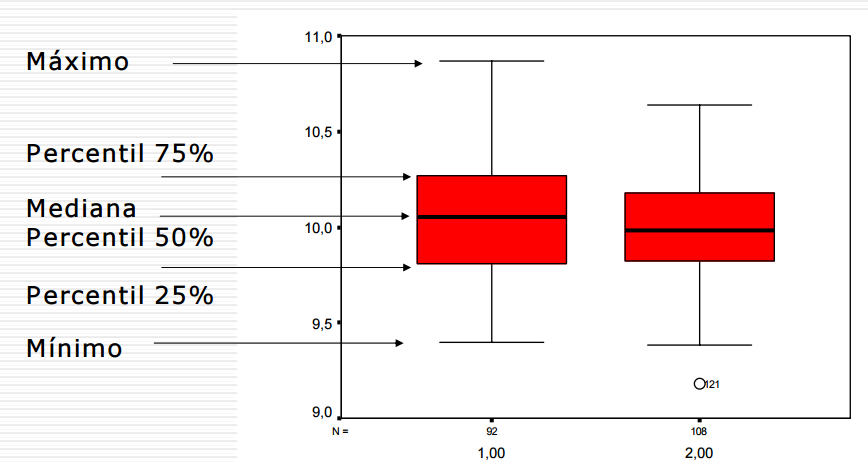

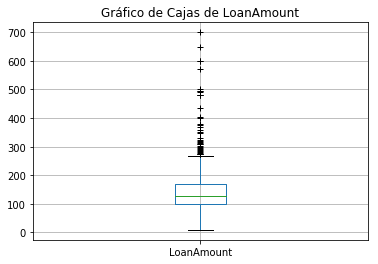

In [73]:
# Gráfico de Cajas
plt.title('Gráfico de Cajas de LoanAmount')
train.boxplot(column='LoanAmount',showfliers='T',notch=0, sym='+', vert=1, whis=1.5)

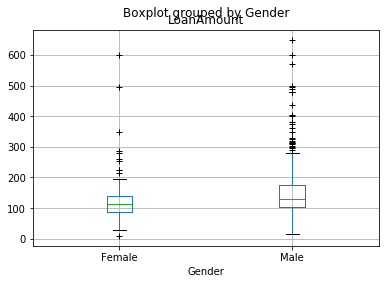

In [74]:
train.boxplot(column='LoanAmount',showfliers='T',notch=0, sym='+', vert=1, whis=1.5,by='Gender')

#### 4 IMPUTACION DE LA DATA

In [75]:
# Revisar los valores perdidos
#Creamos una función:
def num_missing(x):
  return sum(x.isnull())

#Aplicamos por columna:
print ("Valores perdidos por columna")
print (train.apply(num_missing, axis=0)) # Axis = 0 es vertical , axis =1 horizontal.

Valores perdidos por columna
Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [76]:
# Particionando la data en Numéricos (Variables Cuantitativas) y Factores (Variables Cualitativas)

In [77]:
# Recodificando y convirtiendo las variables de acuerdo a nuestro criterio
# Data de Entrenamiento
train['Dependents'] = train['Dependents'].replace({'0': 1,'1': 2, '2': 3, '3+': 4})
train['Gender'] = train['Gender'].replace({'Female': 1,'Male': 2})
train['Married'] = train['Married'].replace({'No': 1,'Yes': 2})
train['Self_Employed'] = train['Self_Employed'].replace({'No': 1,'Yes': 2})
train['Education'] = train['Education'].replace({'Graduate': 1,'Not Graduate': 2})
train['Credit_History'] = train['Credit_History'].replace({0: 1,1: 2})
train['Property_Area'] = train['Property_Area'].replace({'Rural': 1, 'Semiurban': 2, 'Urban': 3})
train['Loan_Status'] = train['Loan_Status'].replace({'N': 0,'Y': 1})

In [78]:
# Revisamos si la recodigicación fue la idónea
train.describe(include='all') 

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,601.000000,611.000000,599.000000,614.000000,582.000000,614.000000,614.000000,592.000000,600.00000,564.000000,614.000000,614.000000
unique,614,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,LP002659,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1.813644,1.651391,1.762938,1.218241,1.140893,5403.459283,1621.245798,146.412162,342.00000,1.842199,2.037459,0.687296
std,NaN,0.389718,0.476920,1.015216,0.413389,0.348211,6109.041673,2926.248369,85.587325,65.12041,0.364878,0.787482,0.463973
min,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,150.000000,0.000000,9.000000,12.00000,1.000000,1.000000,0.000000
25%,NaN,2.000000,1.000000,1.000000,1.000000,1.000000,2877.500000,0.000000,100.000000,360.00000,2.000000,1.000000,0.000000
50%,NaN,2.000000,2.000000,1.000000,1.000000,1.000000,3812.500000,1188.500000,128.000000,360.00000,2.000000,2.000000,1.000000
75%,NaN,2.000000,2.000000,3.000000,1.000000,1.000000,5795.000000,2297.250000,168.000000,360.00000,2.000000,3.000000,1.000000


In [79]:
# Recodificando y convirtiendo las variables de acuerdo a nuestro criterio
# Data de Test
test = pd.read_csv("C:/Users/ASUS/test.csv") # Leer el dataset en un dataframe usando pandas
test['Dependents'] = test['Dependents'].replace({'0': 1,'1': 2, '2': 3, '3+': 4})
test['Gender'] = test['Gender'].replace({'Female': 1,'Male': 2})
test['Married'] = test['Married'].replace({'No': 1,'Yes': 2})
test['Self_Employed'] = test['Self_Employed'].replace({'No': 1,'Yes': 2})
test['Education'] = test['Education'].replace({'Graduate': 1,'Not Graduate': 2})
test['Credit_History'] = test['Credit_History'].replace({0: 1,1: 2})
test['Property_Area'] = test['Property_Area'].replace({'Rural': 1, 'Semiurban': 2, 'Urban': 3})

In [80]:
# Revisamos si la recodigicación fue la idónea
test.describe(include='all') 

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
count,367,356.000000,367.000000,357.000000,367.000000,344.000000,367.000000,367.000000,362.000000,361.000000,338.000000,367.000000
unique,367,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,LP002786,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1.803371,1.634877,1.829132,1.228883,1.107558,4805.599455,1569.577657,136.132597,342.537396,1.825444,2.079019
std,NaN,0.398009,0.482122,1.071302,0.420687,0.310273,4910.685399,2334.232099,61.366652,65.156643,0.380150,0.824337
min,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,28.000000,6.000000,1.000000,1.000000
25%,NaN,2.000000,1.000000,1.000000,1.000000,1.000000,2864.000000,0.000000,100.250000,360.000000,2.000000,1.000000
50%,NaN,2.000000,2.000000,1.000000,1.000000,1.000000,3786.000000,1025.000000,125.000000,360.000000,2.000000,2.000000
75%,NaN,2.000000,2.000000,3.000000,1.000000,1.000000,5060.000000,2430.500000,158.000000,360.000000,2.000000,3.000000


In [81]:
# Creamos un copia del dataset original para poder realizar las imputaciones
# Imputacion del Data train
train_parametrica=train.copy()
train_parametrica.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,2.0,1.0,1.0,1,1.0,5849,0.0,NaN,360.0,2.0,3,1
1,LP001003,2.0,2.0,2.0,1,1.0,4583,1508.0,128.0,360.0,2.0,1,0
2,LP001005,2.0,2.0,1.0,1,2.0,3000,0.0,66.0,360.0,2.0,3,1
3,LP001006,2.0,2.0,1.0,2,1.0,2583,2358.0,120.0,360.0,2.0,3,1
4,LP001008,2.0,1.0,1.0,1,1.0,6000,0.0,141.0,360.0,2.0,3,1


In [82]:
# Imputación Paramétrica
# Para variables cuantitativas se puede usar medias o medianas, para las cualitativas moda.
# Imputamos por las moda todas las variables cualitativas
from scipy.stats import mode

for column in ['Gender', 'Married', 'Self_Employed', 'Credit_History','Dependents']:
    train_parametrica[column] = train_parametrica[column].fillna(train_parametrica[column].mode()[0])

# Imputamos por las moda todas las variables cuantitativas

for column in ['LoanAmount', 'Loan_Amount_Term']:
    train_parametrica[column] = train_parametrica[column].fillna(train_parametrica[column].mean())    

In [83]:
train_parametrica.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,1.817590,1.653094,1.744300,1.218241,1.133550,5403.459283,1621.245798,146.412162,342.000000,1.855049,2.037459,0.687296
std,0.386497,0.476373,1.009623,0.413389,0.340446,6109.041673,2926.248369,84.037468,64.372489,0.352339,0.787482,0.463973
min,1.000000,1.000000,1.000000,1.000000,1.000000,150.000000,0.000000,9.000000,12.000000,1.000000,1.000000,0.000000
25%,2.000000,1.000000,1.000000,1.000000,1.000000,2877.500000,0.000000,100.250000,360.000000,2.000000,1.000000,0.000000
50%,2.000000,2.000000,1.000000,1.000000,1.000000,3812.500000,1188.500000,129.000000,360.000000,2.000000,2.000000,1.000000
75%,2.000000,2.000000,2.000000,1.000000,1.000000,5795.000000,2297.250000,164.750000,360.000000,2.000000,3.000000,1.000000
max,2.000000,2.000000,4.000000,2.000000,2.000000,81000.000000,41667.000000,700.000000,480.000000,2.000000,3.000000,1.000000


In [84]:
# Revisar los valores perdidos
#Creamos una función:
def num_missing(x):
  return sum(x.isnull())

#Aplicamos por columna:
print ("Valores perdidos por columna")
print (train_parametrica.apply(num_missing, axis=0)) 

Valores perdidos por columna
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


In [85]:
max(train["Dependents"])

4.0

In [86]:
# Imputacion del Data Test
test_parametrica=test.copy()
test_parametrica.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,2.0,2,1.0,1,1.0,5720,0,110.0,360.0,2.0,3
1,LP001022,2.0,2,2.0,1,1.0,3076,1500,126.0,360.0,2.0,3
2,LP001031,2.0,2,3.0,1,1.0,5000,1800,208.0,360.0,2.0,3
3,LP001035,2.0,2,3.0,1,1.0,2340,2546,100.0,360.0,NaN,3
4,LP001051,2.0,1,1.0,2,1.0,3276,0,78.0,360.0,2.0,3


In [87]:
# Revisar los valores perdidos
#Creamos una función:
def num_missing(x):
  return sum(x.isnull())
#Aplicamos por columna:
print ("Valores perdidos por columna")
print (test_parametrica.apply(num_missing, axis=0)) 

Valores perdidos por columna
Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64


In [88]:
# Imputación Paramétrica
# Para variables cuantitativas se puede usar medias o medianas, para las cualitativas moda.
# Imputamos por las moda todas las variables cualitativas
from scipy.stats import mode

for column in ['Gender', 'Married', 'Self_Employed', 'Credit_History','Dependents']:
    test_parametrica[column] = test_parametrica[column].fillna(test_parametrica[column].mode()[0])
    
# Imputamos por las moda todas las variables cuantitativas
for column in ['LoanAmount', 'Loan_Amount_Term']:
    test_parametrica[column] = test_parametrica[column].fillna(test_parametrica[column].median())  

In [89]:
test_parametrica['Gender']

0      2.0
1      2.0
2      2.0
3      2.0
4      2.0
5      2.0
6      1.0
7      2.0
8      2.0
9      2.0
10     2.0
11     2.0
12     2.0
13     2.0
14     1.0
15     2.0
16     2.0
17     2.0
18     2.0
19     2.0
20     2.0
21     1.0
22     2.0
23     1.0
24     2.0
25     2.0
26     2.0
27     2.0
28     2.0
29     2.0
      ... 
337    2.0
338    2.0
339    1.0
340    2.0
341    2.0
342    2.0
343    2.0
344    2.0
345    2.0
346    2.0
347    2.0
348    2.0
349    2.0
350    2.0
351    2.0
352    2.0
353    2.0
354    2.0
355    2.0
356    2.0
357    2.0
358    2.0
359    2.0
360    1.0
361    2.0
362    2.0
363    2.0
364    2.0
365    2.0
366    2.0
Name: Gender, Length: 367, dtype: float64

In [90]:
test_parametrica['Gender'].mode()[0]

2.0

In [91]:
a["a"].mean()

NameError: name 'a' is not defined

#### 5 CREACION Y TRANSFORMACION DE VARIABLES

##### Creación de Variables Paramétricamente o por Decisión de Negocio

In [92]:
# También conocido como proceso de Feature Engineering, no olvidar que todo lo que le hacemos al Train o Entrenamiento se lo
# debemos hacer a la data de test.

In [93]:
#Creación de variables a partir de las definidas
import numpy as np
import pandas as pd

#Creamos las variables para el entrenamiento o train
train_parametrica['TotalIncome'] = train_parametrica['ApplicantIncome'] + train_parametrica['CoapplicantIncome']
train_parametrica['LoanAmount_Log'] = round(np.log(train_parametrica['LoanAmount']),2)
train_parametrica['AmountxTerm']=round(train_parametrica['LoanAmount']/train_parametrica['Loan_Amount_Term'],2)

#Creamos las variables para la validación o test


test_parametrica['TotalIncome'] = test_parametrica['ApplicantIncome'] + test_parametrica['CoapplicantIncome']
test_parametrica['LoanAmount_Log'] = round(np.log(test_parametrica['LoanAmount']),2)
test_parametrica['AmountxTerm']=round(test_parametrica['LoanAmount']/test_parametrica['Loan_Amount_Term'],2)


In [94]:
# Revisamos las variables creadas, derrepente queremos crear algunas más?
train_parametrica.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,LoanAmount_Log,AmountxTerm
0,LP001002,2.0,1.0,1.0,1,1.0,5849,0.0,146.412162,360.0,2.0,3,1,5849.0,4.99,0.41
1,LP001003,2.0,2.0,2.0,1,1.0,4583,1508.0,128.000000,360.0,2.0,1,0,6091.0,4.85,0.36


In [95]:
# Le quitamos la variable Loan_ID o identificador único para poder modelar la información 
train_parametrica = train_parametrica.drop('Loan_ID', axis=1)

In [96]:
# Partición Muestral de la Información
# Creación de la data de train y la data de test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_parametrica.drop('Loan_Status', axis=1), 
                                                    train_parametrica['Loan_Status'], test_size=0.30,
                                                    stratify=train_parametrica['Loan_Status'],
                                                   random_state=100)

In [97]:
# Concatenamos las covariables y la variable dependiente del train para poder balancearlo
train_Xy = pd.concat([X_train, y_train], axis=1)

In [98]:
# Puedo corroborar que en mi data de train sigo teniendo el desbalance
train_Xy.Loan_Status.value_counts()

1    295
0    134
Name: Loan_Status, dtype: int64

#### 6 BALANCEO DE LOS DATOS Y SELECCIÓN DE DRIVERS

## Remuestreo

Una técnica ampliamente adoptada para tratar conjuntos de datos altamente desequilibrados se llama remuestreo. Consiste en eliminar muestras de la clase mayoritaria (submuestreo o undersampling) y / o agregar más ejemplos de la clase minoritaria (sobremuestreo o oversampling).



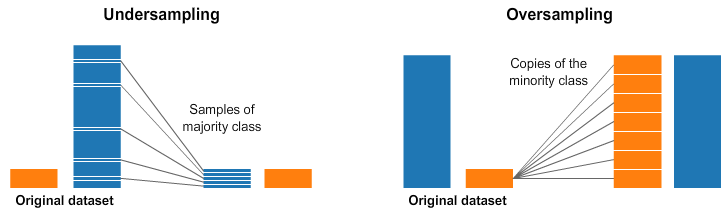

In [99]:
train_Xy.head(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,TotalIncome,LoanAmount_Log,AmountxTerm,Loan_Status
544,1.0,2.0,1.0,2,1.0,3017,663.0,102.0,360.0,2.0,2,3680.0,4.62,0.28,1
13,2.0,1.0,1.0,1,1.0,1853,2840.0,114.0,360.0,2.0,1,4693.0,4.74,0.32,0
383,2.0,1.0,1.0,1,2.0,7167,0.0,128.0,360.0,2.0,3,7167.0,4.85,0.36,1


Clase 0: 134
Clase 1: 295
Proportion Clase 0: 0.31 : 0
Proportion Clase 1: 0.69 : 1


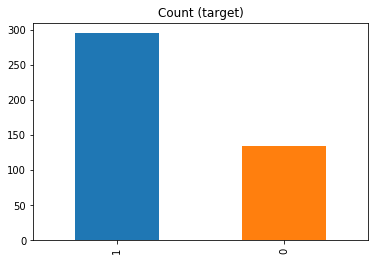

In [100]:
## Podemos hacer el balanceo de manera artesanal , para entender las lógicas.

import numpy as np
import pandas as pd
import seaborn as sns

target_count = train_Xy.Loan_Status.value_counts()
print('Clase 0:', target_count[0])
print('Clase 1:', target_count[1])

print('Proportion Clase 0:', round(target_count[0] / (target_count[0]+target_count[1]), 2), ': 0')
print('Proportion Clase 1:', round(target_count[1] / (target_count[0]+target_count[1]), 2), ': 1')


target_count.plot(kind='bar', title='Count (target)');



In [101]:
# Conteo de las Clases
# La clase 1 es la de los préstamos otorgados , tenemos 422 préstamos otorgados
# La clase 0 es la de los préstamos no otorgados , tenemos 192 préstamos no otorgados
count_class_1,count_class_0 = train_Xy.Loan_Status.value_counts()

# Dividimos las Clases
df_class_0 = train_Xy[train_Xy['Loan_Status'] == 0]
df_class_1 = train_Xy[train_Xy['Loan_Status'] == 1]

## Podemos visualizar el contenido del objeto df_class_1.head(5)

#### Undersampling o sub-muestreo

Random under-sampling:
1    134
0    134
Name: Loan_Status, dtype: int64


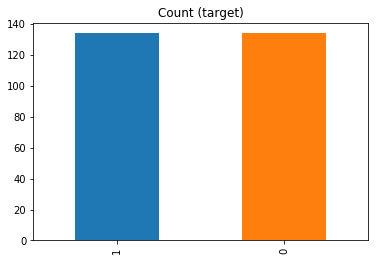

In [102]:
# Definimos una nueva variable llamada df_class_1_under la cual nos da un muestreo de la clase 1 dependiendo del número de 
# elementos de la clase 0.
df_class_1_under = df_class_1.sample(count_class_0)
df_balanceado_under = pd.concat([df_class_1_under, df_class_0], axis=0)

print('Random under-sampling:')
print(df_balanceado_under.Loan_Status.value_counts())

df_balanceado_under.Loan_Status.value_counts().plot(kind='bar', title='Count (target)');

#### Oversampling o sobre-muestreo

Random over-sampling:
1    295
0    295
Name: Loan_Status, dtype: int64


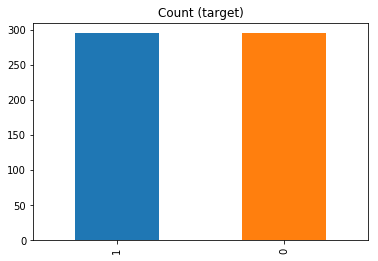

In [103]:
# Leemos la lógica : Del dataset de la clase 0 , sacamos una muestra de tamaño 422 con reemplazo.
df_class_0_over = df_class_0.sample(count_class_1, replace=True)
df_balanceado_over = pd.concat([df_class_1, df_class_0_over], axis=0)

print('Random over-sampling:')
print(df_balanceado_over.Loan_Status.value_counts())

df_balanceado_over.Loan_Status.value_counts().plot(kind='bar', title='Count (target)');



## Selección de Drivers

### Selección de Drivers Mediante Técnicas de Machine Learning - Random Forest

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import tree

In [105]:
# Dividimos el dataset en X e y
X_over=df_balanceado_over.drop('Loan_Status',axis=1)
y_over=df_balanceado_over['Loan_Status']

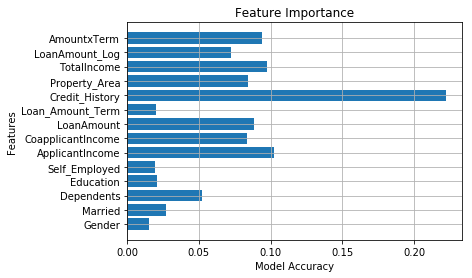

In [106]:
# Ajustamos un modelo , puede ser Random Forest
extree = ExtraTreesClassifier()
extree.fit(X_over, y_over)

# Mostramos o guardamos la importancia relativa
relval = extree.feature_importances_

# Graficamos la importancia relativa de las variables
pos = np.arange(14) + 0.5
plt.barh(pos, relval, align='center')
plt.title("Feature Importance")
plt.xlabel("Model Accuracy")
plt.ylabel("Features")
plt.yticks(pos, X_over.columns)
plt.grid(True)


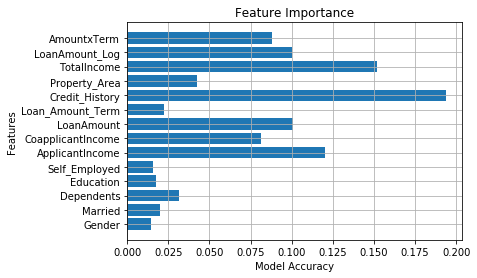

In [107]:
from sklearn.ensemble import RandomForestClassifier as RFC
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

forest = RFC(n_jobs=2,n_estimators=50)
forest.fit(X_over, y_over)
importances = forest.feature_importances_


# horizontal bar plot of feature importance
pos = np.arange(14) + 0.5
plt.barh(pos, importances, align='center')
plt.title("Feature Importance")
plt.xlabel("Model Accuracy")
plt.ylabel("Features")
plt.yticks(pos, X_over.columns)
plt.grid(True)


#### 7 MODELADO DE LA DATA

In [108]:
# Data Final : df_balanceado_smt pueden elegir cualquiera resultado del producto de un método de balanceo
import pandas as pd
from matplotlib import pyplot as plt

In [109]:
# Creación de la data de train, separando o haciendo un split de nuestra información
X_train = X_over
y_train = y_over

In [110]:
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(590, 14) (590,)
(185, 14) (185,)


#### Modelos Supervisados : Random Forest

In [111]:
from sklearn.ensemble import RandomForestClassifier
# Parámetros  :
# max_features : None ,'sqrt',%X
# n_estimators  : Número de árboles a utilizar
# min_sample_leaf : Tamaño mínimo de elementos en hojas terminales (Nodos hijos)
# random_state : Semilla aleatoria
# oob_score : Error fuera de bolsa
rf = RandomForestClassifier(max_features=4 , n_estimators=200,oob_score=True,max_depth=2)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features=4, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [112]:
#Calculamos la clase predicha, para poder evaluar la clasificación
y_pred = rf.predict(X_test)

In [113]:
# Validamos los resultados
from sklearn.metrics import (precision_score, recall_score,f1_score,accuracy_score)
print("\tAccuracy: %1.3f\n" % accuracy_score(y_test, y_pred))
print("\tPrecision: %1.3f" % precision_score(y_test, y_pred))
print("\tRecall: %1.3f" % recall_score(y_test, y_pred))
print("\tF1: %1.3f\n" % f1_score(y_test, y_pred))

	Accuracy: 0.800

	Precision: 0.781
	Recall: 0.984
	F1: 0.871



#### Realizamos la metodología de Cross Validation para tener un modelo preciso y estable a la vez

In [114]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score

kfold = model_selection.KFold(n_splits=10, random_state=7)
rf = RandomForestClassifier(max_features='sqrt', n_estimators=500,oob_score=True)
scoring = 'accuracy'
results = model_selection.cross_val_score(rf, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.858


In [115]:
# Obtenemos la matriz de confusión con las métricas anteriores
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.92      0.40      0.55        58
          1       0.78      0.98      0.87       127

avg / total       0.82      0.80      0.77       185



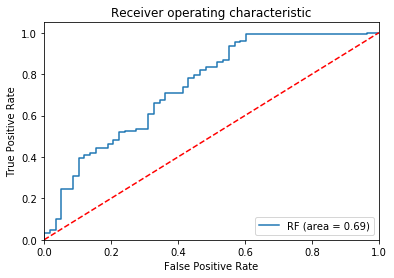

In [116]:
# Obtenemos la Curva Roc

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import (precision_score, recall_score,f1_score,accuracy_score)

rf = RandomForestClassifier(max_features=5 , n_estimators=200,oob_score=True,max_depth=2)
rf.fit(X_train, y_train)

rf_roc_auc = roc_auc_score(y_test, rf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='RF (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Random_Forest_ROC')
plt.show()

In [117]:
#Le quitamos el ID para poder scorear o puntuar el modelo
scorear = test_parametrica.copy()


______________________________________

### Recordatorio

Antes de seguir, es necesario recordar como funciona el reshape, y lo recordaremos viendo el siguiente ejemplo:

In [160]:
mini_lista = [1,2,3,4]

In [161]:
mini_data = pd.DataFrame({"columna":mini_lista})  # Convierto mi mini_lista en un "dataframe"
mini_data

,columna
0,1
1,2
2,3
3,4


Lo que hace el .values.reshape(-1,1) es transponer los valores de mini_data en formato de arreglo.

In [163]:
mini_data["columna"].values.reshape(-1,1)


array([[1],
       [2],
       [3],
       [4]], dtype=int64)

#### FIN DEL RECORDATORIO

_______________________________

# Continuando...

Predice el target usando la data "scorear" y lo guarda en la variable "y_final"

In [130]:
y_final = rf.predict(scorear)

Ahora necesita formar dos columnas, una columna con los ID's y otra columna con los "score". Para eso hará lo siguiente:

Crea un arreglo con dos varios elementos separado en dos columnas: La primera columna serán los ID's y la segunda columna será la variable anteriormente creada "y_final". Así sabremos específicamente a que cliente le corresponde 1 o 0.

In [131]:
data = np.hstack((test_parametrica['Loan_ID'].values.reshape(-1,1), y_final.reshape(-1,1)))
data

array([['LP001015', 1],
       ['LP001022', 1],
       ['LP001031', 1],
       ['LP001035', 1],
       ['LP001051', 1],
       ['LP001054', 1],
       ['LP001055', 1],
       ['LP001056', 0],
       ['LP001059', 1],
       ['LP001067', 1],
       ['LP001078', 1],
       ['LP001082', 1],
       ['LP001083', 1],
       ['LP001094', 0],
       ['LP001096', 1],
       ['LP001099', 1],
       ['LP001105', 1],
       ['LP001107', 1],
       ['LP001108', 1],
       ['LP001115', 1],
       ['LP001121', 1],
       ['LP001124', 1],
       ['LP001128', 1],
       ['LP001135', 1],
       ['LP001149', 1],
       ['LP001153', 0],
       ['LP001163', 1],
       ['LP001169', 1],
       ['LP001174', 1],
       ['LP001176', 1],
       ['LP001177', 1],
       ['LP001183', 1],
       ['LP001185', 1],
       ['LP001187', 1],
       ['LP001190', 1],
       ['LP001203', 0],
       ['LP001208', 1],
       ['LP001210', 1],
       ['LP001211', 1],
       ['LP001219', 1],
       ['LP001220', 1],
       ['LP00122

Lo que hace ahora es convertir ese horrible arreglo en el formato "Dataframe", poniéndole los nombres a cada columna:

In [133]:
df_submmit = pd.DataFrame(data, columns=['Loan_ID','Loan_Status'])
df_submmit

,Loan_ID,Loan_Status
0,LP001015,1
1,LP001022,1
2,LP001031,1
3,LP001035,1
4,LP001051,1
5,LP001054,1
6,LP001055,1
7,LP001056,0
8,LP001059,1
9,LP001067,1


Luego, como originalmente la columna "Loan_Status" tenía los valores "Y" y "N", entonces para subirlo a Analythic Vidha y pueda ser scoreado, es necesario volverlo a su forma original, para eso se hace lo siguiente:

In [135]:
df_submmit['Loan_Status']=["Y" if i == 1 else "N" for i in df_submmit['Loan_Status']]
df_submmit

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
5,LP001054,Y
6,LP001055,Y
7,LP001056,N
8,LP001059,Y
9,LP001067,Y


Y por último lo pasamos a archivo .csv para subirlo directamente a AV!

In [137]:
df_submmit.to_csv('Submmit_Random_Forest001.csv', index=False)

In [128]:
#Creamos una copia para no perder el dataset de test o validación ya imputado
y_final = rf.predict(scorear) # Predecimos sobre nuevos clientes o clientes sin la variable dependiente VD
data = np.hstack((test_parametrica['Loan_ID'].values.reshape(-1,1), y_final.reshape(-1,1)))
df_submmit = pd.DataFrame(data, columns=['Loan_ID','Loan_Status'])
df_submmit['Loan_Status']=["Y" if i == 1 else "N" for i in df_submmit['Loan_Status']]
df_submmit.to_csv('Submmit_Random_Forest001.csv', index=False)

#### Modelos Supervisados : Random Forest - Grid Search

In [61]:
# Grid Search de Parámetros de Random Forest
# Cargar las librerías necesarias

from time import time
from scipy.stats import randint as sp_randint # Devuelve un numero entero entre los valores indicados

from sklearn.model_selection import GridSearchCV # Primera manera de búsqueda de parámetros
from sklearn.model_selection import RandomizedSearchCV # Segunda manera de búsqueda de parámetros

# Construir una función que nos ayude a poder elegir el mejor clasificador
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Modelo con rango: {0}".format(i))
            print("Validación de Score Promedio: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [62]:
# Definimos un clasificador , generalmente uno sin tunear
rf_t = RandomForestClassifier(n_estimators=100)

In [63]:
# Especificar los parámetros que uno desea buscar o encontrar (También un posible rango de valores)

param_dist = {"max_depth": [2,3,4,5],
              "max_features": sp_randint(1, 11),
              "min_samples_split": sp_randint(2, 11),
              "min_samples_leaf": sp_randint(1, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}



In [64]:
## Probamos la primera búsqueda con un Random Grid Search CV

In [66]:
# Correr los modelos con CV, es éste caso Random Grid Search CV
n_iter_search = 10
rs_cv = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=n_iter_search)

NameError: name 'clf' is not defined

In [66]:
start = time()
rs_cv.fit(X_train, y_train)
print("RandomizedSearchCV tomó %.2f segundos para %d candidatos"
      " configuración de parámetros." % ((time() - start), n_iter_search))

report(rs_cv.cv_results_)

RandomizedSearchCV tomó 0.95 segundos para 10 candidatos configuración de parámetros.
Modelo con rango: 1
Validación de Score Promedio: 0.712 (std: 0.018)
Parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 5, 'max_features': 3, 'min_samples_leaf': 7, 'min_samples_split': 6}

Modelo con rango: 2
Validación de Score Promedio: 0.703 (std: 0.025)
Parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 5, 'max_features': 3, 'min_samples_leaf': 2, 'min_samples_split': 7}

Modelo con rango: 3
Validación de Score Promedio: 0.685 (std: 0.019)
Parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 5, 'max_features': 9, 'min_samples_leaf': 2, 'min_samples_split': 5}

Modelo con rango: 3
Validación de Score Promedio: 0.685 (std: 0.002)
Parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 4, 'max_features': 10, 'min_samples_leaf': 5, 'min_samples_split': 7}



In [ ]:
## Probamos la primera búsqueda con un Grid Search CV

In [67]:
# Especificar los parámetros que uno desea buscar o encontrar (También un posible rango de valores)
param_grid = {"max_depth": [2,3,4,5],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}


In [69]:
# run grid search
grid_search = GridSearchCV(clf, param_grid=param_grid, cv=10)
start = time()
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [2, 3, 4, 5], 'max_features': [1, 3, 10], 'min_samples_split': [2, 3, 10], 'bootstrap': [True, False], 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [70]:
print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(grid_search.cv_results_['params'])))
report(grid_search.cv_results_)

GridSearchCV took 64.94 seconds for 144 candidate parameter settings.
Modelo con rango: 1
Validación de Score Promedio: 0.768 (std: 0.049)
Parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 5, 'max_features': 1, 'min_samples_split': 2}

Modelo con rango: 2
Validación de Score Promedio: 0.759 (std: 0.038)
Parameters: {'bootstrap': False, 'criterion': 'gini', 'max_depth': 5, 'max_features': 1, 'min_samples_split': 3}

Modelo con rango: 2
Validación de Score Promedio: 0.759 (std: 0.046)
Parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 5, 'max_features': 1, 'min_samples_split': 3}



In [71]:
# Elegimos el modelo más adecuado para correr nuestro modelo

In [ ]:
#Creamos una copia para no perder el dataset de test o validación ya imputado
y_final = rf.predict(scorear) # Predecimos sobre nuevos clientes o clientes sin la variable dependiente VD
data = np.hstack((test_parametrica['Loan_ID'].values.reshape(-1,1), y_final.reshape(-1,1)))
df_submmit = pd.DataFrame(data, columns=['Loan_ID','Loan_Status'])
df_submmit['Loan_Status']=["Y" if i == 1 else "N" for i in df_submmit['Loan_Status']]
df_submmit.to_csv('Submmit_Random_Forest001.csv', index=False)